In [1]:
import platform

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use('ggplot')
%matplotlib inline

if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'AppleGothic'

import warnings
warnings.filterwarnings(action = 'ignore')

```python
# VDS 지점 교통량 데이터에서 '경부선' 데이터만 추출해주는 함수 생성
def pre_processing(data):
    data = data[data['도로명'] == '경부선']
    return data

# 반복문을 사용하여 데이터 불러오기
for num in range(1, 32):
    path = 'data/7월/{}일.csv'.format(num)
    globals()['data{}'.format(num)] = pre_processing(pd.read_csv(path, encoding = 'CP949'))

# 불러온 데이터 병합
final = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, 
                   data14, data15, data16, data17, data18, data19, data20, data21, data22, data23, data24, data25, 
                   data26, data27, data28, data29, data30, data31], axis = 0)
final = final.drop('Unnamed: 12', axis = 1)

# 데이터 저장
final.to_csv('data/7월/7월.csv', encoding = 'CP949')
```

In [2]:
final = pd.read_csv('data/7월/7월.csv', encoding = 'CP949')
final = final.drop('Unnamed: 0', axis = 1)

print('최종 데이터의 행과 열의 개수 :', final.shape, '\n')
print('최종 데이터 VDS의 개수 :', len(final['VDS_ID'].unique()), '\n')

display(final.head())

최종 데이터의 행과 열의 개수 : (2249856, 12) 

최종 데이터 VDS의 개수 : 756 



,기준시간,기준시,기준일,VDS_ID,요일명,지점이정,노드명,도로이정,노선번호,도로명,교통량,평균속도
0,0,0,20200701,0010VDE00100,수요일,1.4,구서IC,0.20,10,경부선,112,91.08
1,0,0,20200701,0010VDE00200,수요일,2.4,영락IC,2.02,10,경부선,110,100.02
2,0,0,20200701,0010VDE00300,수요일,3.3,영락IC,2.02,10,경부선,110,96.66
3,0,0,20200701,0010VDE00400,수요일,4.5,부산TG,4.01,10,경부선,-1,-1.00
4,0,0,20200701,0010VDE00500,수요일,5.1,노포IC,5.08,10,경부선,100,100.46


In [3]:
# 상행, 하행을 구분할 수 있도록 변수 생성
final['구분코드'] = final['VDS_ID'].str[4:7]
display(final.head())

,기준시간,기준시,기준일,VDS_ID,요일명,지점이정,노드명,도로이정,노선번호,도로명,교통량,평균속도,구분코드
0,0,0,20200701,0010VDE00100,수요일,1.4,구서IC,0.20,10,경부선,112,91.08,VDE
1,0,0,20200701,0010VDE00200,수요일,2.4,영락IC,2.02,10,경부선,110,100.02,VDE
2,0,0,20200701,0010VDE00300,수요일,3.3,영락IC,2.02,10,경부선,110,96.66,VDE
3,0,0,20200701,0010VDE00400,수요일,4.5,부산TG,4.01,10,경부선,-1,-1.00,VDE
4,0,0,20200701,0010VDE00500,수요일,5.1,노포IC,5.08,10,경부선,100,100.46,VDE


In [4]:
print('제거 전 데이터의 개수 :', len(final))
print('제거 전 데이터 VDS의 개수 :', len(final['VDS_ID'].unique()), '\n')
VDS_list = final[final['평균속도'] < 0]['VDS_ID'].unique()

final = final[~final['VDS_ID'].isin(VDS_list)]
print('제거 후 데이터의 개수 :', len(final))
print('제거 후 데이터 VDS의 개수 :', len(final['VDS_ID'].unique()))

제거 전 데이터의 개수 : 2249856
제거 전 데이터 VDS의 개수 : 756 

제거 후 데이터의 개수 : 1583232
제거 후 데이터 VDS의 개수 : 532


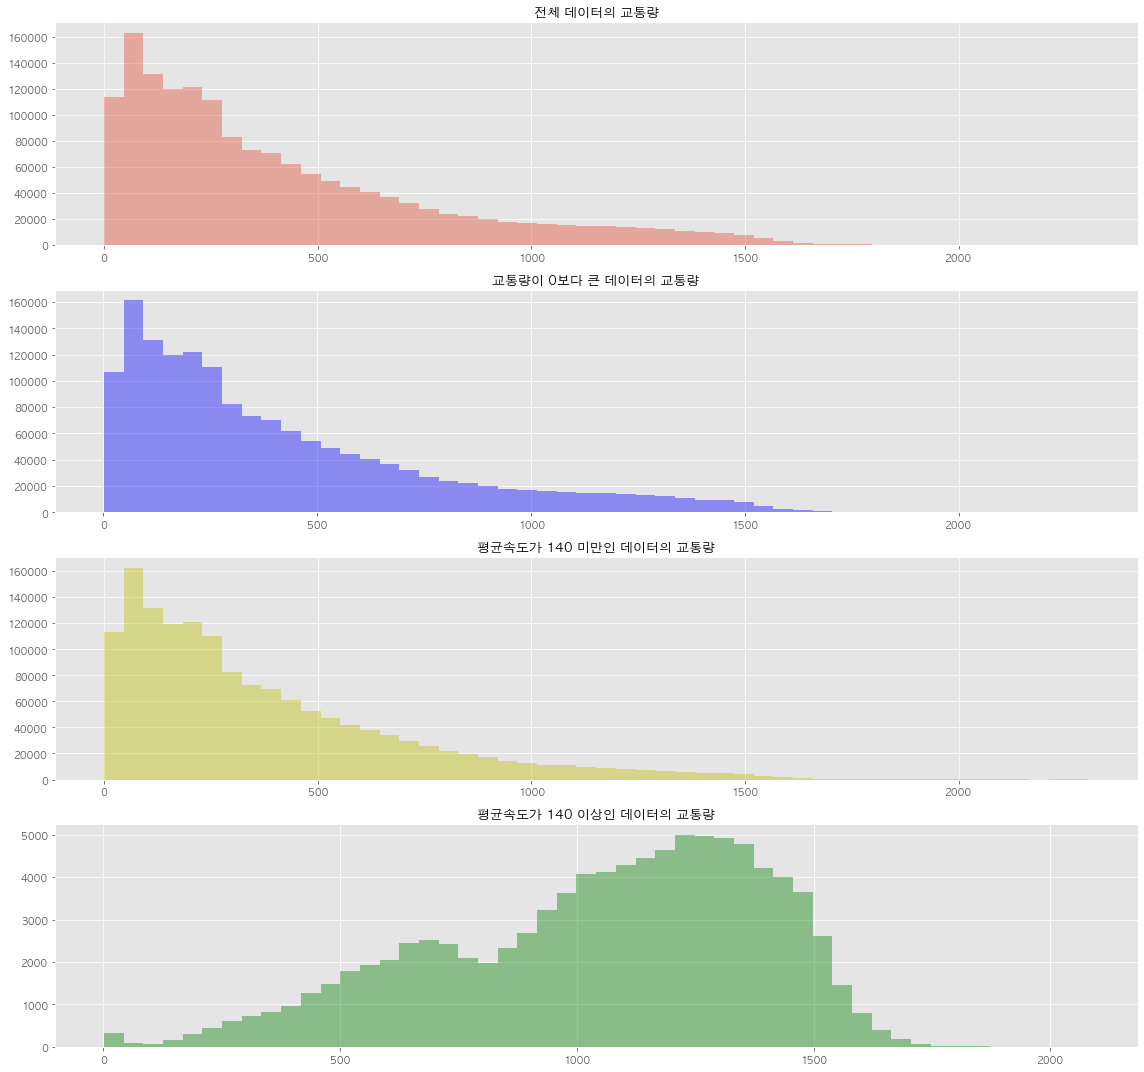

In [5]:
# 전체 데이터의 교통량 분포
fig, axes = plt.subplots(nrows = 4, figsize = (16, 15))

sns.distplot(final['교통량'], kde = False, ax = axes[0])
axes[0].set_xlabel('')
axes[0].set_title('전체 데이터의 교통량', fontsize = 13)

sns.distplot(final[final['교통량'] > 0]['교통량'], kde = False, color = 'b', ax = axes[1])
axes[1].set_xlabel('')
axes[1].set_title('교통량이 0보다 큰 데이터의 교통량', fontsize = 13)

sns.distplot(final[final['평균속도'] < 140]['교통량'], kde = False, color = 'y', ax = axes[2])
axes[2].set_xlabel('')
axes[2].set_title('평균속도가 140 미만인 데이터의 교통량', fontsize = 13)

sns.distplot(final[final['평균속도'] >= 140]['교통량'], kde = False, color = 'g', ax = axes[3])
axes[3].set_xlabel('')
axes[3].set_title('평균속도가 140 이상인 데이터의 교통량', fontsize = 13)

fig.tight_layout()

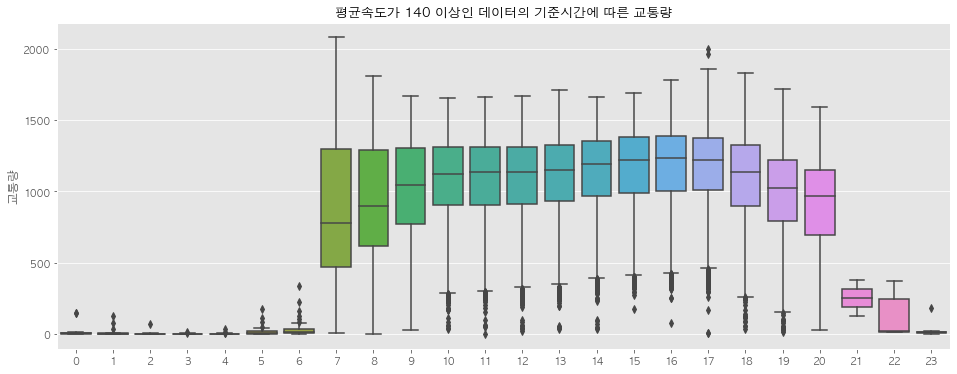

In [6]:
plt.figure(figsize = (16, 6))

sns.boxplot(x = '기준시간', y = '교통량', data = final[final['평균속도'] >= 140])
plt.xlabel('')
plt.title('평균속도가 140 이상인 데이터의 기준시간에 따른 교통량', fontsize = 13)
plt.show()

In [7]:
# 상행, 하행 데이터 분류
상행 = final[final['구분코드'] == 'VDE']
하행 = final[final['구분코드'] == 'VDS']

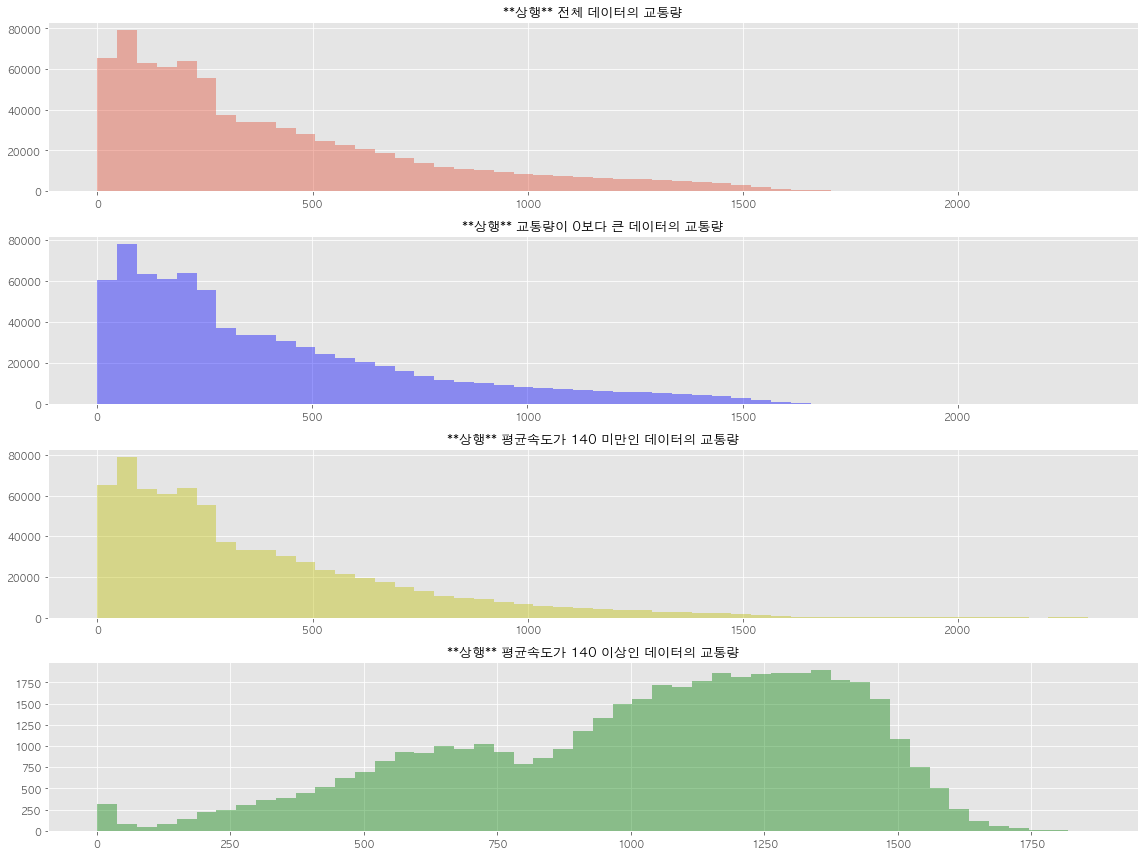

In [8]:
# 상행 데이터의 교통량 분포
fig, axes = plt.subplots(nrows = 4, figsize = (16, 12))

sns.distplot(상행['교통량'], kde = False, ax = axes[0])
axes[0].set_xlabel('')
axes[0].set_title('**상행** 전체 데이터의 교통량', fontsize = 13)

sns.distplot(상행[상행['교통량'] > 0]['교통량'], kde = False, color = 'b', ax = axes[1])
axes[1].set_xlabel('')
axes[1].set_title('**상행** 교통량이 0보다 큰 데이터의 교통량', fontsize = 13)

sns.distplot(상행[상행['평균속도'] < 140]['교통량'], kde = False, color = 'y', ax = axes[2])
axes[2].set_xlabel('')
axes[2].set_title('**상행** 평균속도가 140 미만인 데이터의 교통량', fontsize = 13)

sns.distplot(상행[상행['평균속도'] >= 140]['교통량'], kde = False, color = 'g', ax = axes[3])
axes[3].set_xlabel('')
axes[3].set_title('**상행** 평균속도가 140 이상인 데이터의 교통량', fontsize = 13)

fig.tight_layout()

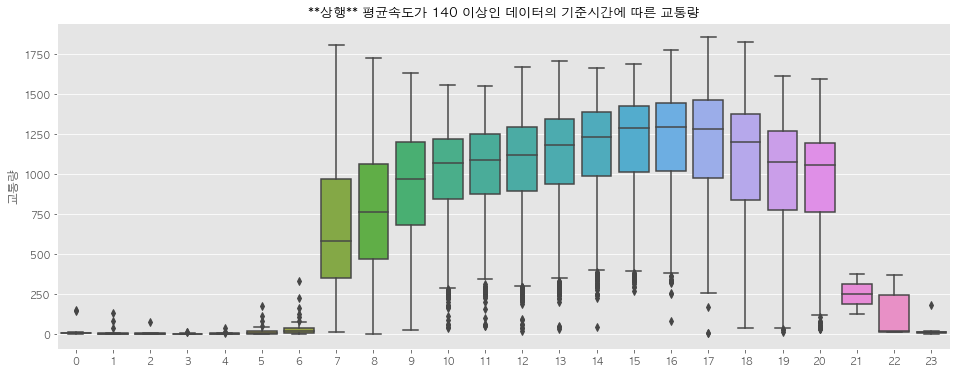

In [9]:
plt.figure(figsize = (16, 6))

sns.boxplot(x = '기준시간', y = '교통량', data = 상행[상행['평균속도'] >= 140])
plt.xlabel('')
plt.title('**상행** 평균속도가 140 이상인 데이터의 기준시간에 따른 교통량', fontsize = 13)
plt.show()

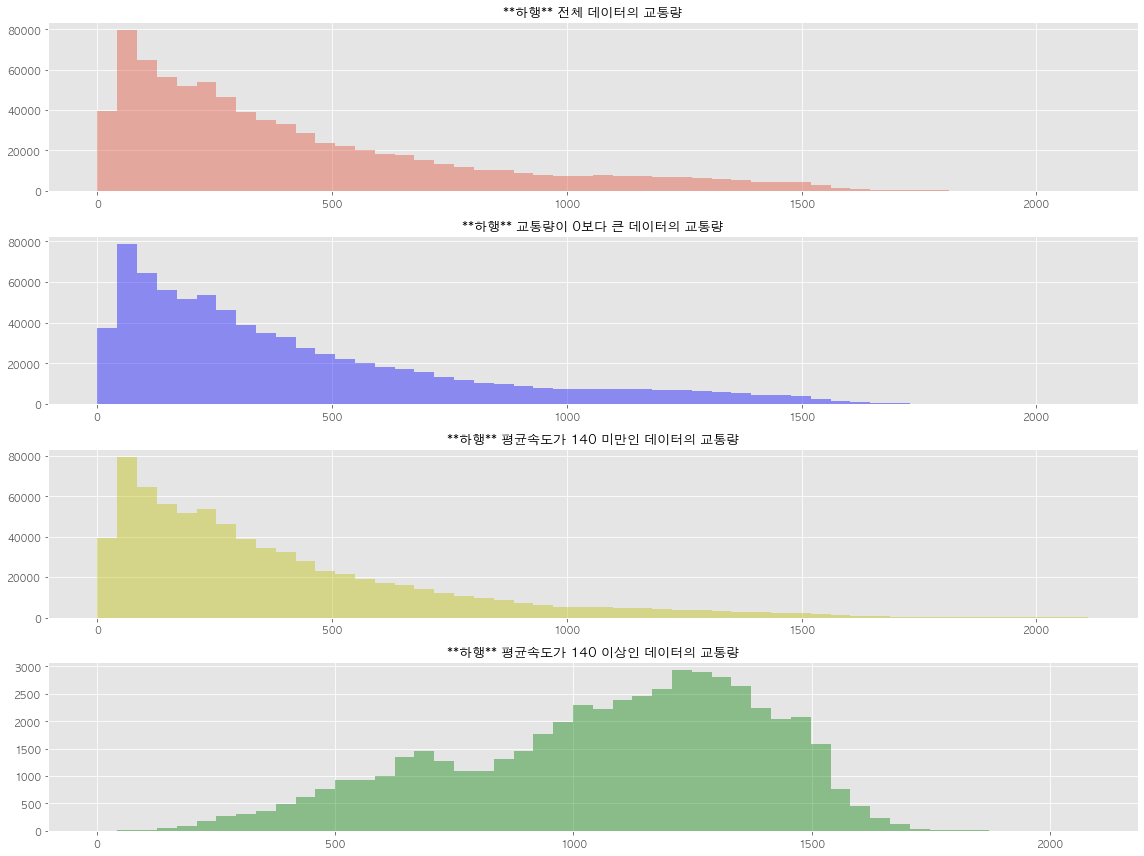

In [10]:
# 하행 데이터의 교통량 분포
fig, axes = plt.subplots(nrows = 4, figsize = (16, 12))

sns.distplot(하행['교통량'], kde = False, ax = axes[0])
axes[0].set_xlabel('')
axes[0].set_title('**하행** 전체 데이터의 교통량', fontsize = 13)

sns.distplot(하행[하행['교통량'] > 0]['교통량'], kde = False, color = 'b', ax = axes[1])
axes[1].set_xlabel('')
axes[1].set_title('**하행** 교통량이 0보다 큰 데이터의 교통량', fontsize = 13)

sns.distplot(하행[하행['평균속도'] < 140]['교통량'], kde = False, color = 'y', ax = axes[2])
axes[2].set_xlabel('')
axes[2].set_title('**하행** 평균속도가 140 미만인 데이터의 교통량', fontsize = 13)

sns.distplot(하행[하행['평균속도'] >= 140]['교통량'], kde = False, color = 'g', ax = axes[3])
axes[3].set_xlabel('')
axes[3].set_title('**하행** 평균속도가 140 이상인 데이터의 교통량', fontsize = 13)

fig.tight_layout()

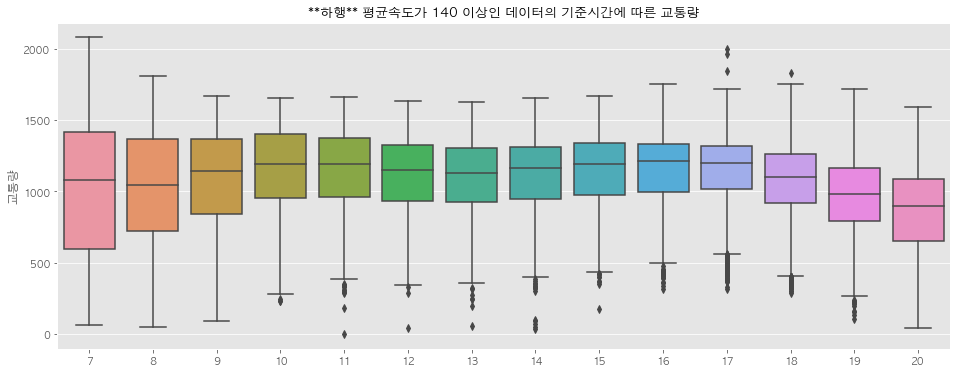

In [11]:
plt.figure(figsize = (16, 6))

sns.boxplot(x = '기준시간', y = '교통량', data = 하행[하행['평균속도'] >= 140])
plt.xlabel('')
plt.title('**하행** 평균속도가 140 이상인 데이터의 기준시간에 따른 교통량', fontsize = 13)
plt.show()